# Unsupervised Learning

In [ ]:
-->It make use of use unlabeled data. In this case target variable is not fixed.

-->Applications of Unsupervised Learning
 Customer segmentation 
 Recommendation Engines 
 Identifying Accident Prone Areas
 Anomaly detection 
 Measuring academic results 
 Real estate

-->Unsupervised learning can be further grouped into types: 
    1. Clustering : It will make group based on simiarity. the output is not fixed. 
    2. Dimensionality Reduction 
    3. Association

# Clustering 

In [ ]:
-->In Clustering there are two types : 
    1)K-means Clustering : It is a centroid or distance based algorithm which groups your data into no.of clusters 
                    based on the similarity. it uses equclide dist to map the data to the clusters.
            
       -->To find the value of k we use elbo method. It make use of intra cluster dist.
    
       -->"silhouette_score" : It make use of both intra and inter cluster dist.
        
    2)Hierarchical Clustering 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('driver-data.csv')

In [3]:
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
data.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [6]:
data.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [7]:
features=data.drop(['id'], axis = 1)

In [8]:
features.shape

(4000, 2)

In [9]:
from sklearn.cluster import KMeans

In [10]:
my_cluster_model=KMeans(n_clusters=2)

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
labels=my_cluster_model.fit_predict(features)

In [13]:
data['cluster']=my_cluster_model.labels_

In [14]:
data

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


<Axes: ylabel='count'>

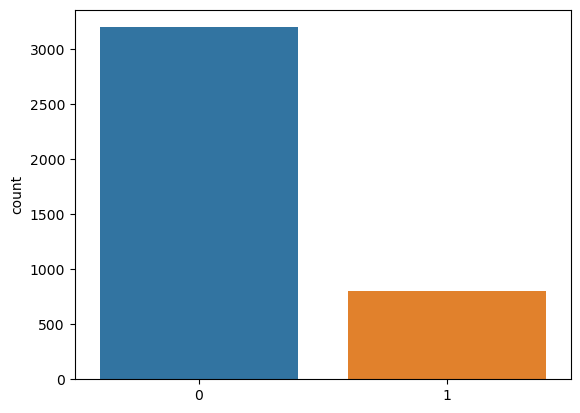

In [15]:
sns.countplot(x=labels)

In [16]:
data.groupby('cluster').count()['id']

cluster
0    3200
1     800
Name: id, dtype: int64

In [17]:
my_cluster_model.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

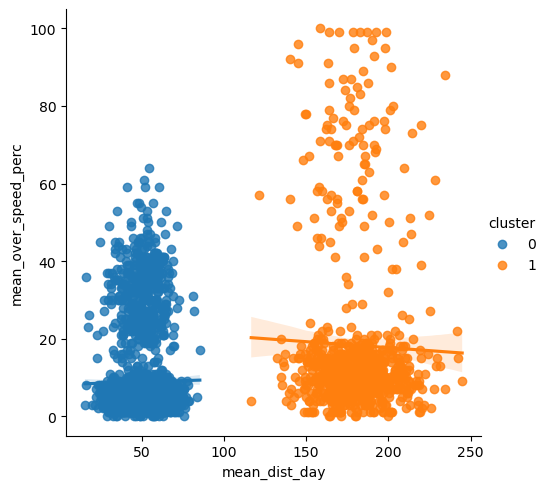

In [18]:
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=data,hue='cluster'); #seaborn.lmplot() method is used to draw a scatter plot.
plt.show()

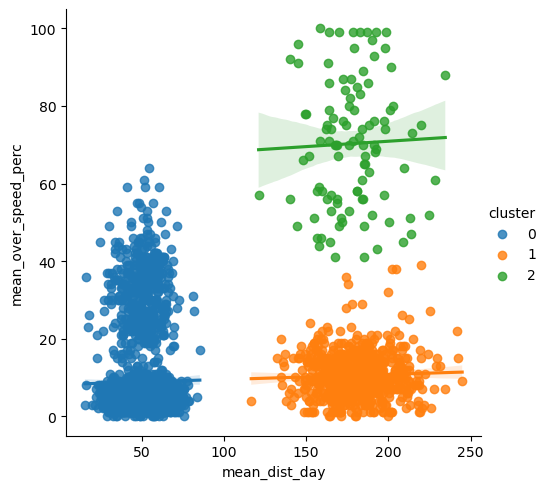

In [19]:
my_cluster_model=KMeans(n_clusters=3)
labels=my_cluster_model.fit_predict(features)
data['cluster']=my_cluster_model.labels_
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=data,hue='cluster');
plt.show()

In [20]:
my_cluster_model.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154]])

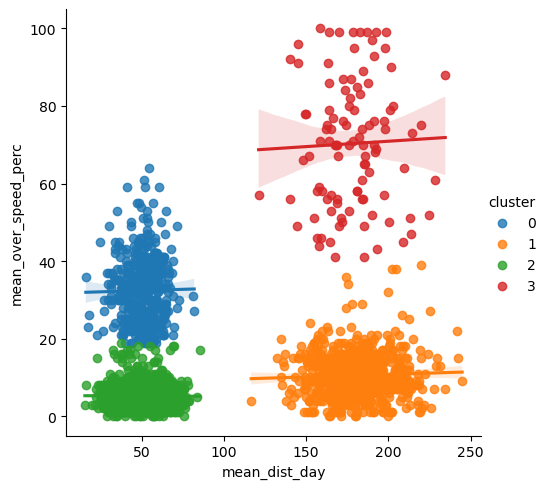

In [21]:
my_cluster_model=KMeans(n_clusters=4)
labels=my_cluster_model.fit_predict(features)
data['cluster']=my_cluster_model.labels_
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=data,hue='cluster');
plt.show()

In [22]:
my_cluster_model.cluster_centers_

array([[ 50.43591549,  32.39671362],
       [180.34311782,  10.52011494],
       [ 49.98800649,   5.20944484],
       [177.83509615,  70.28846154]])

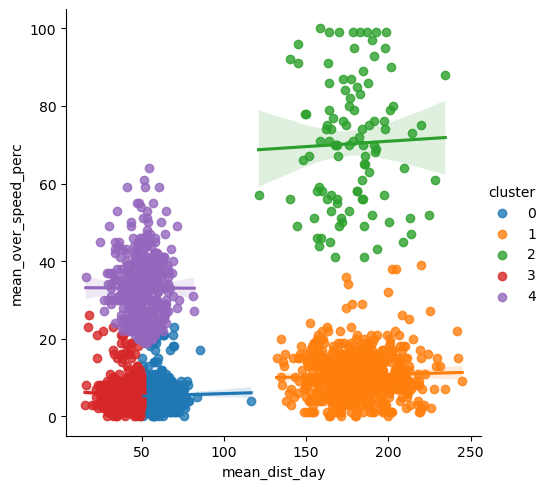

In [23]:
my_cluster_model=KMeans(n_clusters=5)
labels=my_cluster_model.fit_predict(features)
data['cluster']=my_cluster_model.labels_
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=data,hue='cluster');
plt.show()

In [24]:
my_cluster_model.cluster_centers_

array([[ 57.88066207,   5.28551724],
       [180.43486331,  10.5294964 ],
       [177.83509615,  70.28846154],
       [ 41.50186944,   5.39169139],
       [ 50.61421836,  33.06203474]])

# Finding K value

In [25]:
wcss=[]  #within a cluster sum of square (c-xi)2
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i, random_state=1)
    Kmeans.fit_predict(features)
    wcss.append(Kmeans.inertia_)   #the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [26]:
wcss

[12184626.129627984,
 1316420.8509477184,
 992634.0606702471,
 719601.1096991899,
 534648.8065571408,
 372825.08573828836,
 319750.2549751174,
 276898.0274133986,
 252652.23523727624,
 230088.80650784972]

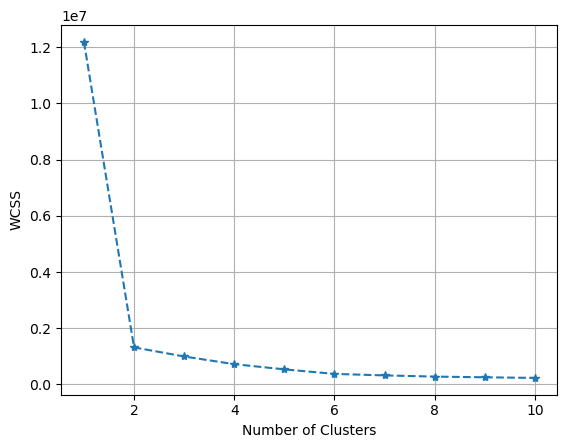

In [29]:
plt.plot(range(1,11),wcss,"*--")
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

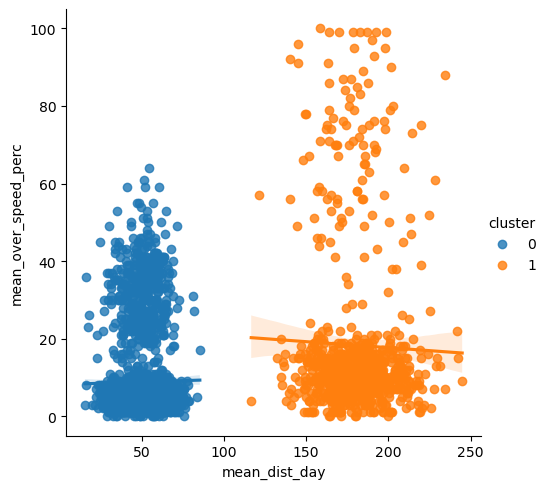

In [34]:
my_cluster_model=KMeans(n_clusters=2)
labels=my_cluster_model.fit_predict(features)
data['cluster']=my_cluster_model.labels_
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=data,hue='cluster');
plt.show()

In [35]:
from sklearn.metrics import silhouette_score
# s = (b - a) / max(a, b)

In [36]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n_clusters in range_n_clusters:
    my_cluster_model = KMeans(n_clusters=n_clusters)
    m = my_cluster_model.fit_predict(features)
    silhouette_avg = silhouette_score(features, m)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.8490223286225532
For n_clusters = 3 The average silhouette_score is : 0.8231396834167266
For n_clusters = 4 The average silhouette_score is : 0.5907475009381601
For n_clusters = 5 The average silhouette_score is : 0.5133381203829992
For n_clusters = 6 The average silhouette_score is : 0.4856768494837404
For n_clusters = 7 The average silhouette_score is : 0.4580604897345031
For n_clusters = 8 The average silhouette_score is : 0.44925614383747925
For n_clusters = 9 The average silhouette_score is : 0.44730471117039994
For n_clusters = 10 The average silhouette_score is : 0.4373631049461223
